# ДЗ №7

In [43]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

## Данные HEART DISEASE 

In [44]:
df = pd.read_csv('data.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.00,0,0.00,0.00,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,2.00,0,0.00,0.00,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,1,48,1.00,1,20.00,0.00,0,0,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,0,61,3.00,1,30.00,0.00,0,1,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,0,46,3.00,1,23.00,0.00,0,0,0,285.00,130.00,84.00,23.10,85.00,85.00,0


## Заменим пропуски

In [45]:
#df.info()
for col in df.columns:
    print("{0}, num. NA's: {1}".format(col, pd.isnull(df[col]).sum()))

male, num. NA's: 0
age, num. NA's: 0
education, num. NA's: 105
currentSmoker, num. NA's: 0
cigsPerDay, num. NA's: 29
BPMeds, num. NA's: 53
prevalentStroke, num. NA's: 0
prevalentHyp, num. NA's: 0
diabetes, num. NA's: 0
totChol, num. NA's: 50
sysBP, num. NA's: 0
diaBP, num. NA's: 0
BMI, num. NA's: 19
heartRate, num. NA's: 1
glucose, num. NA's: 388
TenYearCHD, num. NA's: 0


In [46]:
df['education'].fillna(1.00, inplace=True)
df['cigsPerDay'].fillna(df[df['currentSmoker']==1]['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(0.00, inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)


In [47]:
X = df.drop(['TenYearCHD'], axis=1).as_matrix()
X.shape
#cigsPerDay, totChol, sysBP, heartRate, glucose, diaBP


/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(4238, 15)

In [48]:
y = df['TenYearCHD'].as_matrix()
y.shape

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(4238,)

# 5 компонент компонент объясняют 95% данных

In [49]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

5

## Explained Variance

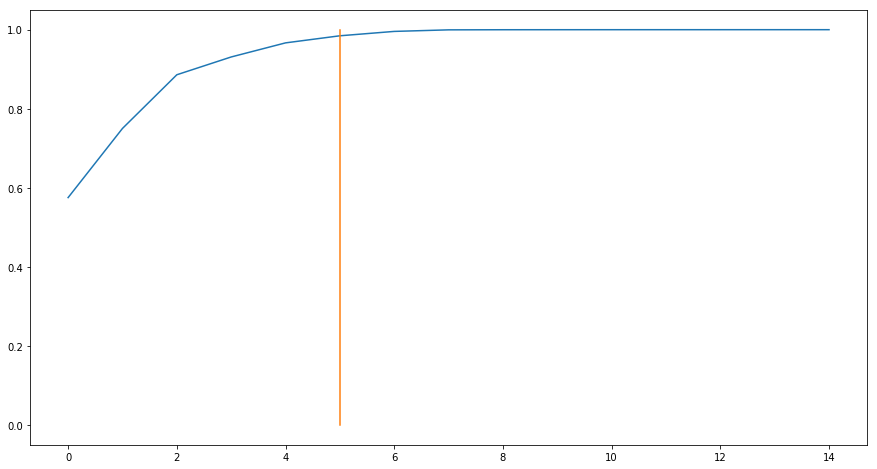

In [50]:
plt.plot(cumsum)
plt.plot([d, d], [0, 1])

In [51]:
x_new = PCA(n_components=3).fit_transform(X)
x_new.shape

(4238, 3)

In [52]:
x_new

array([[-46.23871215, -18.92164107,  11.08726994],
       [ 11.61767993, -11.79484367,   2.28577189],
       [  6.602412  , -13.42057711,  -5.27431669],
       ...,
       [ 10.42031049,  -3.73096498,   7.97909922],
       [-27.16007779,  -0.95050255,  -2.54376273],
       [ 33.2739887 ,  11.69680953,  21.76075103]])

# Из 2х главных компонент не понятно, можно ли разделить данные

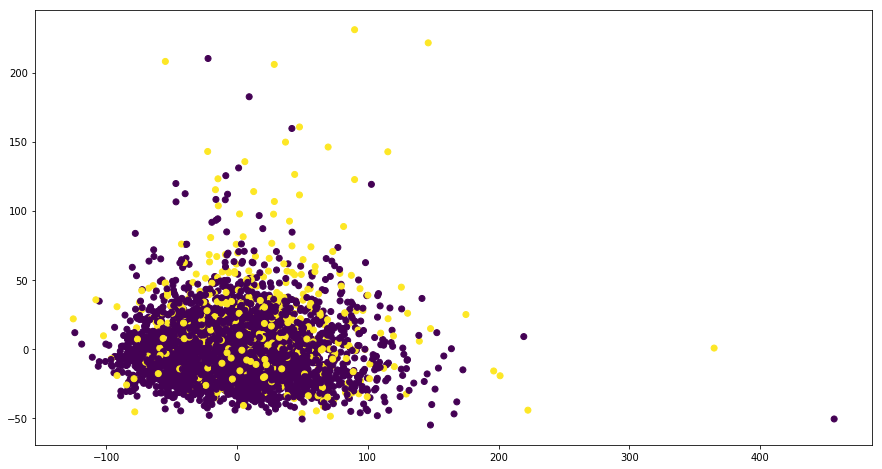

In [53]:
plt.scatter(x_new[:, 0], x_new[:, 1], c=y)

# Из 3х компонент уже более видно, что желтые точки(болезнь) частично отделены от основного массива "здоровых" точек.

<IPython.core.display.Javascript object>


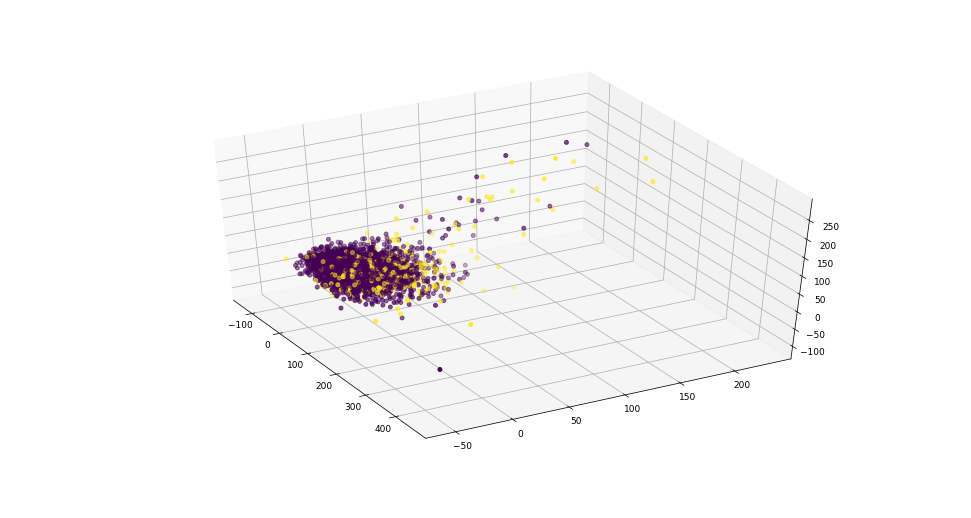

In [54]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2] )
ax.scatter(x_new[:,0], x_new[:,1], x_new[:,2], c=y)

In [21]:
#pca.components_
pca.explained_variance_ratio_

array([5.75301120e-01, 1.74896009e-01, 1.35785671e-01, 4.50041462e-02,
       3.56468157e-02, 1.79356761e-02, 1.10716598e-02, 3.94589671e-03,
       2.81890385e-04, 5.91618539e-05, 3.04893147e-05, 2.78633613e-05,
       7.44366047e-06, 4.51324829e-06, 1.64276331e-06])

In [23]:

#X.shape

## Возьмем только самые важные 5 компонент.

In [58]:
X_data = df.drop(['TenYearCHD'], axis=1)
pca_5 = PCA(n_components=5)
pca_5.fit(X_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## Вывыедем значение компонент для каждого признака

In [59]:
print(pd.DataFrame(pca_5.components_,columns=X_data.columns, index = ['PC-1','PC-2','PC-3', 'PC-4', 'PC-5' ]))

      male   age  education  currentSmoker  cigsPerDay  BPMeds  \
PC-1 -0.00  0.06      -0.00          -0.00       -0.01    0.00   
PC-2 -0.00  0.11      -0.00          -0.00       -0.06    0.00   
PC-3  0.00 -0.05       0.00           0.00        0.01   -0.00   
PC-4  0.01 -0.20       0.00           0.02        0.74   -0.00   
PC-5 -0.01  0.01      -0.00          -0.02       -0.65   -0.00   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  \
PC-1             0.00          0.00      0.00     0.98   0.15   0.06  0.01   
PC-2             0.00          0.01      0.00    -0.16   0.71   0.31  0.05   
PC-3            -0.00         -0.01      0.00     0.07  -0.52  -0.27 -0.03   
PC-4            -0.00         -0.00     -0.00    -0.00  -0.03   0.05 -0.01   
PC-5            -0.00         -0.00     -0.00    -0.01  -0.11  -0.04  0.01   

      heartRate  glucose  
PC-1       0.03     0.04  
PC-2       0.10     0.59  
PC-3      -0.03     0.80  
PC-4       0.65     0.00  

# TSNE 3D

In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
X_reduced = tsne.fit_transform(X)

<IPython.core.display.Javascript object>


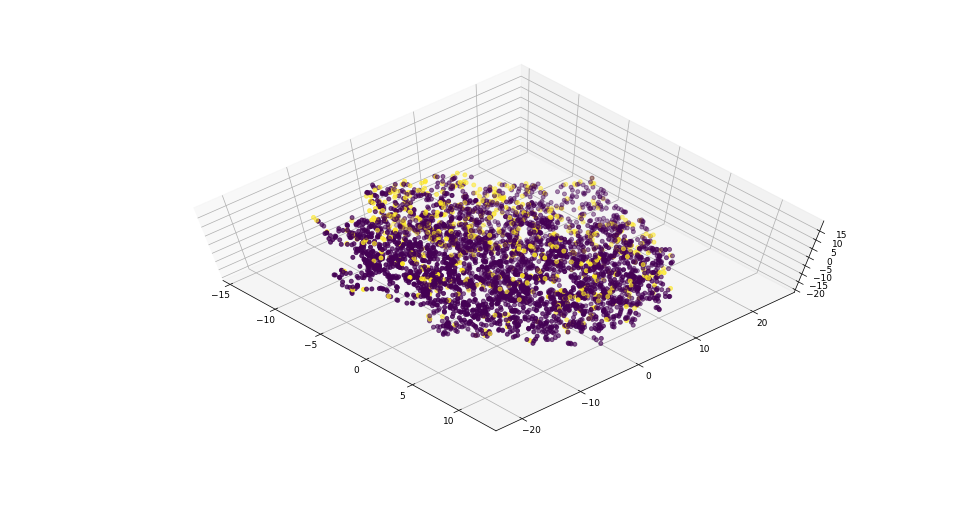

In [28]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2] )
ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c=y)

# TSNE 2D

In [29]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

<IPython.core.display.Javascript object>


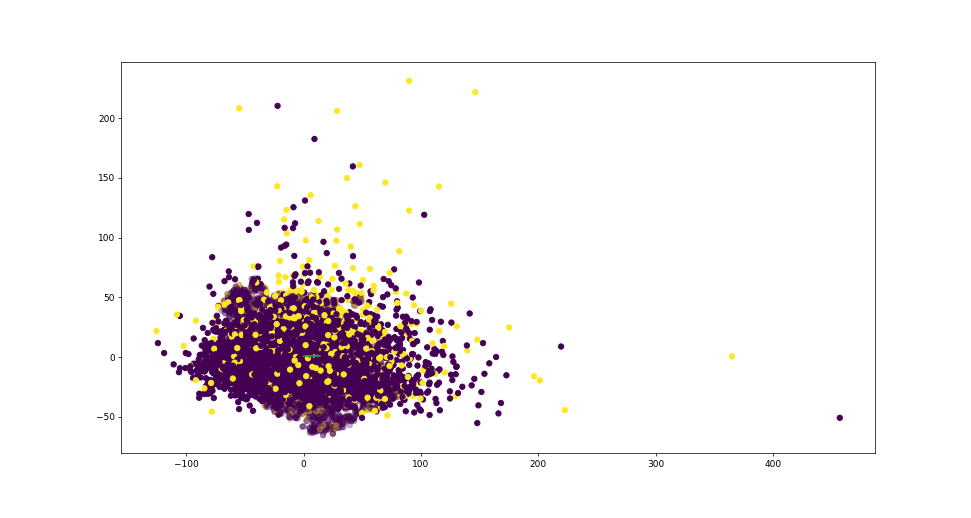

In [30]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.3)